In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [19]:
df = pd.read_csv("sample_sales_data.csv")

In [20]:
df

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card
...,...,...,...,...,...,...,...,...,...,...
7824,7824,6c19b9fc-f86d-4526-9dfe-d8027a4d13ee,2022-03-03 18:22:09,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,e-wallet
7825,7825,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19:14:46,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card
7826,7826,79aee7d6-1405-4345-9a15-92541e9e1e74,2022-03-03 14:00:09,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,basic,14.19,2,28.38,credit card
7827,7827,e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55,2022-03-04 15:11:38,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,basic,16.99,4,67.96,cash


In [21]:
df.describe()

,Unnamed: 0,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000,7829.000000
mean,3914.000000,7.819480,2.501597,19.709905
std,2260.181962,5.388088,1.122722,17.446680
min,0.000000,0.190000,1.000000,0.190000
25%,1957.000000,3.990000,1.000000,6.570000
50%,3914.000000,7.190000,3.000000,14.970000
75%,5871.000000,11.190000,4.000000,28.470000
max,7828.000000,23.990000,4.000000,95.960000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7829 non-null   int64  
 1   transaction_id  7829 non-null   object 
 2   timestamp       7829 non-null   object 
 3   product_id      7829 non-null   object 
 4   category        7829 non-null   object 
 5   customer_type   7829 non-null   object 
 6   unit_price      7829 non-null   float64
 7   quantity        7829 non-null   int64  
 8   total           7829 non-null   float64
 9   payment_type    7829 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 611.8+ KB


In [23]:
df.isnull().sum()

Unnamed: 0        0
transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

In [27]:
df = df.drop(['Unnamed: 0','transaction_id','product_id'],axis=1)

In [28]:
df

,timestamp,category,customer_type,unit_price,quantity,total,payment_type
0,2022-03-02 09:51:38,fruit,gold,3.99,2,7.98,e-wallet
1,2022-03-06 10:33:59,fruit,standard,3.99,1,3.99,e-wallet
2,2022-03-04 17:20:21,fruit,premium,0.19,2,0.38,e-wallet
3,2022-03-02 17:23:58,fruit,gold,0.19,4,0.76,e-wallet
4,2022-03-05 14:32:43,fruit,basic,4.49,2,8.98,debit card
...,...,...,...,...,...,...,...
7824,2022-03-03 18:22:09,cleaning products,basic,14.19,2,28.38,e-wallet
7825,2022-03-04 19:14:46,cleaning products,standard,16.99,1,16.99,credit card
7826,2022-03-03 14:00:09,cleaning products,basic,14.19,2,28.38,credit card
7827,2022-03-04 15:11:38,cleaning products,basic,16.99,4,67.96,cash


In [29]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      7829 non-null   datetime64[ns]
 1   category       7829 non-null   object        
 2   customer_type  7829 non-null   object        
 3   unit_price     7829 non-null   float64       
 4   quantity       7829 non-null   int64         
 5   total          7829 non-null   float64       
 6   payment_type   7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 428.3+ KB


The dataset is of one week dataset dated from 01-03-2022 to 07-03-2022

In [33]:
df['timestamp'].min(),df['timestamp'].max()

(Timestamp('2022-03-01 09:00:13'), Timestamp('2022-03-07 19:59:54'))

In [36]:
df['category'].value_counts(),df['category'].nunique(),df['category'].unique()

(fruit                    998
 vegetables               846
 packaged foods           507
 baked goods              443
 canned foods             431
 refrigerated items       425
 kitchen                  382
 meat                     382
 dairy                    375
 beverages                301
 cheese                   293
 cleaning products        292
 baking                   264
 snacks                   263
 frozen                   263
 seafood                  253
 medicine                 243
 baby products            224
 condiments and sauces    181
 personal care            177
 pets                     161
 spices and herbs         125
 Name: category, dtype: int64,
 22,
 array(['fruit', 'vegetables', 'refrigerated items', 'frozen',
        'spices and herbs', 'canned foods', 'packaged foods',
        'condiments and sauces', 'beverages', 'dairy', 'cheese', 'meat',
        'seafood', 'baked goods', 'baking', 'snacks', 'baby products',
        'pets', 'personal care', 'm

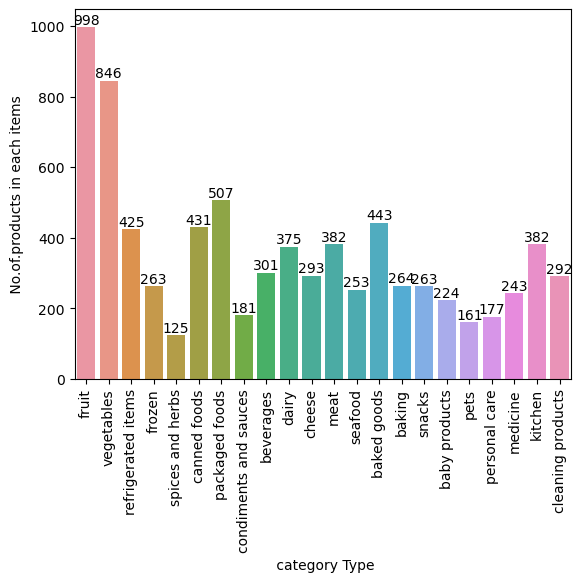

In [56]:
data = sns.countplot(x = 'category',data = df)
for label in data.containers:
    data.bar_label(label)
plt.xlabel(" category Type")
plt.ylabel(" No.of.products in each items ")
plt.xticks(rotation=90)
plt.show()

In [42]:
df['customer_type'].value_counts(),df['customer_type'].value_counts(normalize=True)

(non-member    1601
 standard      1595
 premium       1590
 basic         1526
 gold          1517
 Name: customer_type, dtype: int64,
 non-member    0.204496
 standard      0.203730
 premium       0.203091
 basic         0.194916
 gold          0.193767
 Name: customer_type, dtype: float64)

In [43]:
df['payment_type'].value_counts(),df['payment_type'].value_counts(normalize=True)

(cash           2027
 credit card    1949
 e-wallet       1935
 debit card     1918
 Name: payment_type, dtype: int64,
 cash           0.258909
 credit card    0.248946
 e-wallet       0.247158
 debit card     0.244987
 Name: payment_type, dtype: float64)

### custom program definition models

In [ ]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

def correlation_plot(data: pd.DataFrame = None):
  corr = df.corr()
  corr.style.background_gradient(cmap='coolwarm')